In [13]:
# This cell is all about plotting orbital probabilities and saving them to a folder as a png file
# importing relevant packages 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math as maths
import os

# The name of the folder were making
directory_name = "Spherical_Harmonics"

# Creating the folder
# If an error comes up making the directory the excepts will tell us
try:
    os.mkdir(directory_name)
    print(f"Directory {directory_name} created successfully.")
except FileExistsError:
    print(f"Directory {directory_name} already exists.")
except PermissionError:
    print(f"Permission denied: Unable to create {directory_name}.")
except Exception as e:
    print(f"An error occurred: {e}")
          
# defining sperical harmonics function and assigning value of Legendre polynomials for given l and ml 
# decided not to solve through legendre polynomial because well I don't know how and it would be hard to do symbolic calculations in python
# Phi and theta will be assigned with np.linspace l and ml will range from 0 to 3
# For simplicity we aren't graphing the negative values of ml as they produce orthoganal graphs to the positive m counterparts
# this function will generate a probability density from the values of Y generated in spherical 
def probability (l,ml,directory_name):
    theta_deg = np.linspace(0, 180, 200)   # [0, pi]
    phi_deg = np.linspace(0, 360, 200)   # [0, 2pi]
    PHI, THETA = np.meshgrid(phi_deg, theta_deg)
    
#     Convert to radians for Spehrical Harmonics Calculation
    theta_radians = np.radians(THETA)
    phi_radians = np.radians(PHI)


#     tabulated solutions to ascociated legendre polynomials in polar coordinates
    if l == 0 and ml == 0:
            P = 1
    elif l == 1 and ml == 0:
            P = np.cos(theta_radians)
    elif l == 1 and ml == 1:
            P = np.sin(theta_radians)
    elif l == 2 and ml == 0:
            P = 0.5*(3*(np.cos(theta_radians))**2 - 1)
    elif l == 2 and ml == 1:
            P = 3*np.cos(theta_radians)*np.sin(theta_radians)
    elif l == 2 and ml == 2:
            P = 3*np.sin(theta_radians)**2
    elif l==3 and ml == 0:
            P = 0.5*np.cos(theta_radians)*(5*np.cos(theta_radians)**2 -3)
    elif l==3 and ml == 1:
            P =-1.5*(5*np.cos(theta_radians)**2 -1)*np.sin(theta_radians)
    elif l==3 and ml == 2:
            P = 15*np.cos(theta_radians)*np.sin(theta_radians)**2
    elif l==3 and ml == 3:
            P = -15*np.sin(theta_radians)**3
    
    Y = ((2*l+1)*maths.factorial(l-np.abs(ml))/(4*np.pi*(l+maths.factorial(np.abs(ml))))**0.5)*P*np.exp(1j*ml*phi_radians)
    r =(Y.real)**2
    
    #     Convert to cartesian for graphing
    x = r * np.sin(theta_radians) * np.cos(phi_radians)
    y = r * np.sin(theta_radians) * np.sin(phi_radians)
    z = r * np.cos(theta_radians)
    
#     3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, facecolors=plt.cm.magma(r / r.max()), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=0.9)
    
    ax.set_title(f"3D Probability Density Y.real(l={l}, m={ml})²")
    ax.set_box_aspect([1,1,1])
    plt.tight_layout()

    
#     Defining Directory and File Name
    output_dir = f"/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/{directory_name}" 
    file_name = f"l_{l}_ml_{ml}_SphericalHarmonics.png"
    os.chdir(output_dir)

#     save figure
    plt.savefig(file_name, dpi=200)
    plt.close()
    
      
    
    print(f"'{file_name}' saved to '{output_dir}'")
    return


# loop running probability for values of l and ml
for l in range(0,4):
    for ml in range(0,4):
        if ml > l: #ml can't be greater than l or the wave function breaks down
            break
        probability(l,ml,directory_name)



Directory Spherical_Harmonics created successfully.
'l_0_ml_0_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'
'l_1_ml_0_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'
'l_1_ml_1_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'
'l_2_ml_0_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'
'l_2_ml_1_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'
'l_2_ml_2_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'
'l_3_ml_0_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'
'l_3_ml_1_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'
'l_3_ml_2_SphericalH

Predicted l = 3, ml = 3 (Mean squared error = 2.4889e-03)


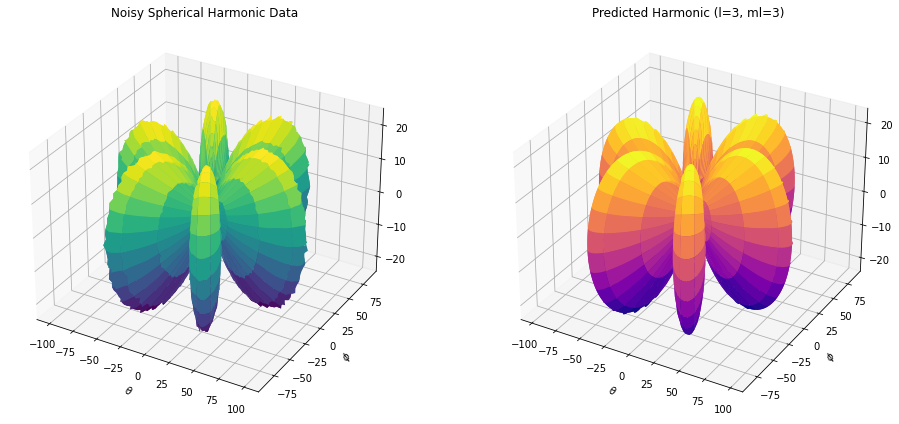

'Noisy and predicted l_3_ml_3_SphericalHarmonics.png' saved to '/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/Spherical_Harmonics'


In [18]:
# creating and fitting fake data set
# importing relevant packages
import numpy as np
import math as maths
import random as rm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# creating input variables
theta = np.linspace(0,np.pi,200) # [0, pi]
phi = np.linspace(0, 2*np.pi, 200)   # [0, 2pi]
tp = np.column_stack((theta, phi))


# need to play shenanigans with the input variable so its only one for non linear curve fitting
def probability (tp,l,ml):
    theta = tp[:,0]
    phi = tp[:,1]
    
#     Make into meshgrid so every possible combination is ran through
    phi_radians, theta_radians = np.meshgrid(phi, theta)

#     tabulated solutions to ascociated legendre polynomials in polar coordinates
    if l == 0 and ml == 0:
            P = 1
    elif l == 1 and ml == 0:
            P = np.cos(theta_radians)
    elif l == 1 and ml == 1:
            P = np.sin(theta_radians)
    elif l == 2 and ml == 0:
            P = 0.5*(3*(np.cos(theta_radians))**2 - 1)
    elif l == 2 and ml == 1:
            P = 3*np.cos(theta_radians)*np.sin(theta_radians)
    elif l == 2 and ml == 2:
            P = 3*np.sin(theta_radians)**2
    elif l==3 and ml == 0:
            P = 0.5*np.cos(theta_radians)*(5*np.cos(theta_radians)**2 -3)
    elif l==3 and ml == 1:
            P =-1.5*(5*np.cos(theta_radians)**2 -1)*np.sin(theta_radians)
    elif l==3 and ml == 2:
            P = 15*np.cos(theta_radians)*np.sin(theta_radians)**2
    elif l==3 and ml == 3:
            P = -15*np.sin(theta_radians)**3
    
    
#     Actual spherical Harmonics function
    Y = ((2*l+1)*maths.factorial(l-np.abs(ml))/(4*np.pi*(l+maths.factorial(np.abs(ml))))**0.5)*P*np.exp(1j*ml*phi_radians)
   
    return Y.real

# Producing random l and ml and y
r_l = rm.randint(0, 3)
r_ml = rm.randint(0, r_l)

r_Y = probability(tp,r_l,r_ml)

# Let's add noise
n_Y = r_Y + 0.05 * np.random.normal(size=r_Y.shape)


# flattens the meshgrid generates all possible data for l and ml and then compares the noisy data to the calculatd data to match the most likely values (shown through an error term) of l and ml
min_error = float('inf')
fit_lml = (None, None)

for l in range(0, 4):
    for ml in range(0, l+1):
        try:
            Y_pred = probability(tp, l, ml)
#             Chi^2 
            error = mean_squared_error(n_Y.flatten(), Y_pred.flatten())
            if error < min_error:
                min_error = error
                fit_lml = (l, ml)
        except:
            continue

print(f"Predicted l = {fit_lml[0]}, ml = {fit_lml[1]} (Mean squared error = {min_error:.4e})")


p_Y = probability(tp,fit_lml[0],fit_lml[1])

# Make into meshgrid so every possible combination is ran through
phi_radians, theta_radians = np.meshgrid(phi, theta)

fig = plt.figure(figsize=(14, 6))

# Convert to probability densities
n_r = n_Y**2
p_r = r_Y**2


# Convert to Cartesian Coordinates noisy
n_x = n_r * np.sin(theta_radians) * np.cos(phi_radians)
n_y = n_r * np.sin(theta_radians) * np.sin(phi_radians)
n_z = n_r * np.cos(theta_radians)
    
# Convert to Cartesian Coordinates predicted
p_x = p_r * np.sin(theta_radians) * np.cos(phi_radians)
p_y = p_r * np.sin(theta_radians) * np.sin(phi_radians)
p_z = p_r * np.cos(theta_radians)
    
# Plot noisy data
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(n_x, n_y, n_z, cmap='viridis')
ax1.set_title('Noisy Spherical Harmonic Data')
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\phi$')

# Plot predicted data
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(p_x, p_y, p_z, cmap='plasma')
ax2.set_title(f'Predicted Harmonic (l={fit_lml[0]}, ml={fit_lml[1]})')
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\phi$')

plt.tight_layout()
plt.show()

# Defining Directory and File Name
output_dir = f"/home/ad.csueastbay.edu/su6676/Spherical-Harmonics/{directory_name}" 
file_name = f"Noisy and predicted l_{fit_lml[0]}_ml_{fit_lml[1]}_SphericalHarmonics.png"
os.chdir(output_dir)

# save figure
plt.savefig(file_name, dpi=200)
plt.close()
    
      
    
print(f"'{file_name}' saved to '{output_dir}'")
